<a href="https://colab.research.google.com/github/clrzr/xai-fraud/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
DataFrame_0 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset/credit_card_transactions-ibm_v2.csv")
cards = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset/sd254_cards.csv")[['User','CARD INDEX','Card Type']]

In [ ]:
DataFrame_0=pd.merge(DataFrame_0,cards,how='left',left_on=['User','Card'],right_on=['User','CARD INDEX'])
DataFrame_0=DataFrame_0[DataFrame_0['Card Type']=='Credit']
DataFrame_0

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,CARD INDEX,Card Type
10546,0,3,2003,1,1,06:25,$130.23,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,3,Credit
10547,0,3,2003,1,1,06:47,$73.61,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No,3,Credit
10548,0,3,2003,1,2,07:23,$127.26,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No,3,Credit
10549,0,3,2003,1,3,06:42,$40.52,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No,3,Credit
10550,0,3,2003,1,4,06:00,$142.91,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No,3,Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No,1,Credit
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No,1,Credit
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No,1,Credit
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No,1,Credit


# Trim Dataset

Dataset must be trimed to accomadate Compute & time constraints.

<Axes: xlabel='Year'>

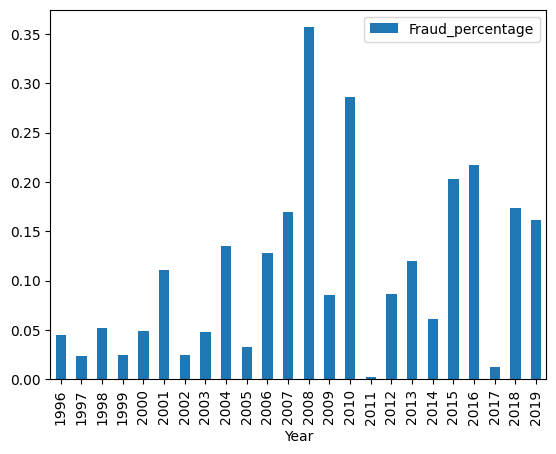

In [ ]:
#Fraudulent transactions changes over the years

import matplotlib.pyplot as plt
DataFrame_fraud=DataFrame_0[['User','Year','Is Fraud?']].groupby(['Year','Is Fraud?']).count().reset_index()
DataFrame_fraud_dict=DataFrame_fraud.groupby('Year')['User'].sum().to_dict()
DataFrame_fraud['Total']=DataFrame_fraud['Year'].map(DataFrame_fraud_dict)
DataFrame_fraud['Fraud_percentage']=(DataFrame_fraud["User"]/DataFrame_fraud['Total'])*100
DataFrame_fraud[['Year','Is Fraud?','Fraud_percentage']]
DataFrame_fraud=DataFrame_fraud.rename(columns={'Is Fraud?':"Fraud"})
DataFrame_fraud=DataFrame_fraud[DataFrame_fraud["Fraud"]!="No"]
DataFrame_fraud.plot(x="Year",y=['Fraud','Fraud_percentage'],kind="bar")

In [ ]:
# From the plot above; 2008, 2010, 2015, 2016, 2018, 2019 have the highest fraud cases
# DataFrame_1=DataFrame_0[(DataFrame_0['Year']==2019)|(DataFrame_0['Year']==2018)|(DataFrame_0['Year']==2017)]
# 2008 is selected because it has the highest amount if fraud
DataFrame_1=DataFrame_0[(DataFrame_0['Year']==2008)]
DataFrame_1
DataFrame_1.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/card_transaction_2008.csv",index= False)

# Pre-processing

In [ ]:
import pandas as pd
DataFrame= pd.read_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/card_transaction_2008.csv")
cards=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset/sd254_cards.csv")

Cleaning the Amount Column

In [ ]:
#Remove Currency Sign

def amount_to_int(z):
  return float(z.replace("$",""))
DataFrame['Amount']=DataFrame['Amount'].apply(amount_to_int)
DataFrame[DataFrame['Is Fraud?']=='Yes']

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,CARD INDEX,Card Type
427,0,3,2008,10,10,09:37,11.04,Swipe Transaction,1913477460590765860,Pasadena,CA,91106.0,5300,NaN,Yes,3,Credit
432,0,3,2008,10,12,11:52,68.86,Swipe Transaction,-245178307025547046,Upland,CA,91786.0,5311,NaN,Yes,3,Credit
433,0,3,2008,10,12,15:54,96.19,Swipe Transaction,3189517333335617109,La Verne,CA,91750.0,5311,NaN,Yes,3,Credit
434,0,3,2008,10,12,15:58,298.00,Swipe Transaction,1715299929786123066,Corona,CA,92881.0,3722,NaN,Yes,3,Credit
436,0,3,2008,10,13,07:02,3.72,Swipe Transaction,1971441525886001364,Upland,CA,91784.0,5300,NaN,Yes,3,Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386136,1961,0,2008,4,18,16:59,26.26,Swipe Transaction,2834328477577416141,Summerdale,PA,17093.0,5651,NaN,Yes,0,Credit
386141,1961,0,2008,4,20,13:36,30.89,Online Transaction,7318338187863890922,ONLINE,NaN,NaN,7996,NaN,Yes,0,Credit
389596,1982,5,2008,8,21,10:53,119.68,Online Transaction,7501849281341469857,ONLINE,NaN,NaN,4722,NaN,Yes,5,Credit
391687,1995,2,2008,7,19,07:09,112.81,Online Transaction,5753024633661164610,ONLINE,NaN,NaN,5311,NaN,Yes,2,Credit


In [ ]:
#View Fraud cases

DataFrame[DataFrame['Is Fraud?']=='Yes']

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,CARD INDEX,Card Type
427,0,3,2008,10,10,09:37,11.04,Swipe Transaction,1913477460590765860,Pasadena,CA,91106.0,5300,NaN,Yes,3,Credit
432,0,3,2008,10,12,11:52,68.86,Swipe Transaction,-245178307025547046,Upland,CA,91786.0,5311,NaN,Yes,3,Credit
433,0,3,2008,10,12,15:54,96.19,Swipe Transaction,3189517333335617109,La Verne,CA,91750.0,5311,NaN,Yes,3,Credit
434,0,3,2008,10,12,15:58,298.00,Swipe Transaction,1715299929786123066,Corona,CA,92881.0,3722,NaN,Yes,3,Credit
436,0,3,2008,10,13,07:02,3.72,Swipe Transaction,1971441525886001364,Upland,CA,91784.0,5300,NaN,Yes,3,Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386136,1961,0,2008,4,18,16:59,26.26,Swipe Transaction,2834328477577416141,Summerdale,PA,17093.0,5651,NaN,Yes,0,Credit
386141,1961,0,2008,4,20,13:36,30.89,Online Transaction,7318338187863890922,ONLINE,NaN,NaN,7996,NaN,Yes,0,Credit
389596,1982,5,2008,8,21,10:53,119.68,Online Transaction,7501849281341469857,ONLINE,NaN,NaN,4722,NaN,Yes,5,Credit
391687,1995,2,2008,7,19,07:09,112.81,Online Transaction,5753024633661164610,ONLINE,NaN,NaN,5311,NaN,Yes,2,Credit


Creating a Datetime Column

In [ ]:
# DataFrame['trans_date_trans_time'] = pd.to_datetime(DataFrame['Year']+'-'+DataFrame['Month']+'-'+DataFrame['Day']+' '+DataFrame['Time'])
def data_time(Year,Month,Day,Time):
  return pd.to_datetime(str(Year)+'-'+str(Month)+'-'+str(Day)+' '+Time)
DataFrame['trans_date_trans_time'] =DataFrame[['Year','Month','Day','Time']].apply(lambda z: data_time(*z), axis=1)
DataFrame.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing.csv",index= True)

In [ ]:
#Extracting Time Features

DataFrame['trans_hour'] = DataFrame['trans_date_trans_time'].dt.hour
DataFrame['day_of_week'] = DataFrame['trans_date_trans_time'].dt.day_name()

#Categorizing Transactions by MCC, #change z to another
def to_catogory(z):
  if 1 <=z<= 1499:
    return 'Agricultural Services'
  if 1500 <=z<= 2999:
    return 'Contracted Services'
  if 3000 <=z<= 3299:
    return '(T&E) Airlines'
  if 3300 <=z<= 3499:
    return '(T&E) Car Rental'
  if 3500 <=z<= 3999:
    return '(T&E) Lodging'
  if 4000 <=z<= 4799:
    return 'Transportation Services'
  if 4800 <=z<= 4999:
    return 'Utility Services'
  if 5000 <=z<= 5599:
    return 'Retail Outlet Services'
  if 5600 <=z<= 5699:
    return 'Clothing Stores'
  if 5700 <=z<= 7299:
    return 'Miscellaneous Stores'
  if 7300 <=z<= 7999:
    return 'Business Services'
  if 8000 <=z<= 8999:
    return 'Professional Services and Membership Organizations'
  if 9000 <=z<= 9999:
    return 'Government Services'
DataFrame['category']=DataFrame[['MCC']].apply(lambda z:to_catogory(*z),axis=1)
DataFrame.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing.csv",index= True)

Merging user information with the transaction data

In [ ]:
users=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset/sd254_users.csv")
users['index']=users.index
DataFrame=pd.merge(DataFrame,users,how='left',left_on='User',right_on='index')
DataFrame.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing.csv",index= True)

In [ ]:
DataFrame=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing.csv")

View Fraudulent transactions by month

<Axes: xlabel='Month'>

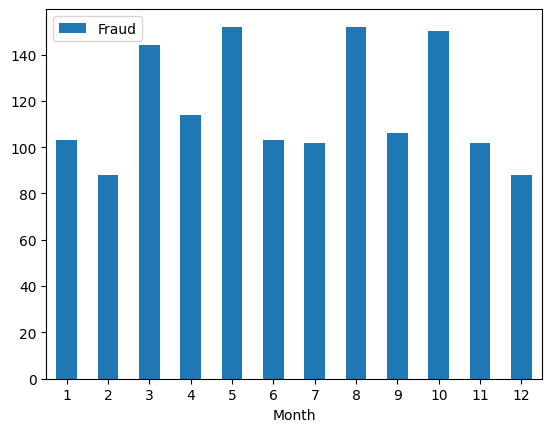

In [ ]:
DataFrame_fraud=DataFrame[['User','Month','Is Fraud?']].groupby(['Month','Is Fraud?']).count().reset_index()
DataFrame_fraud_dict=DataFrame_fraud.groupby('Month')['User'].sum().to_dict()
DataFrame_fraud['Total']=DataFrame_fraud['Month'].map(DataFrame_fraud_dict)
DataFrame_fraud=DataFrame_fraud.rename(columns={'Is Fraud?':"Fraud"})
DataFrame_fraud_filter=DataFrame_fraud[DataFrame_fraud['Fraud']=='Yes'].drop(['Fraud','Total'],axis=1).rename(columns={'User':'Fraud'})
DataFrame_fraud_filter=DataFrame_fraud_filter.set_index('Month')
DataFrame_fraud_filter.plot.bar(rot=0)

# More Triming

Select Months with most Fradulent transcations

In [ ]:
DataFrame=DataFrame[(DataFrame['Month']==10)|(DataFrame['Month']==11)]
# DataFrame=DataFrame[(DataFrame['Month']==7)|(DataFrame['Month']==8)|(DataFrame['Month']==9)|(DataFrame['Month']==10)|(DataFrame['Month']==11)|(DataFrame['Month']==12)]
print(len(DataFrame))
DataFrame[DataFrame['Is Fraud?']=='Yes']
DataFrame=DataFrame.drop(['Unnamed: 0'],axis=1).reset_index(drop=True)
DataFrame.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing_month.csv",index= True)

67706


# Feature Engineering

In [ ]:
DataFrame=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing_month.csv")

compute historical transcation over 60 days

In [ ]:
DataFrame1=DataFrame
DataFrame1['Card']=DataFrame1['Card'].apply(str)
DataFrame1['User']=DataFrame1['User'].apply(str)
DataFrame1['cc_num'] = DataFrame['User']+'_'+DataFrame['Card']
DataFrame1['val_for_agg'] = 1
DataFrame1.index = pd.to_datetime(DataFrame['trans_date_trans_time'])
DataFrame1 = DataFrame1.rename_axis(index={'trans_date_trans_time': 'time_index'})
DataFrame1= DataFrame1.sort_index()
# Number of transaction within 60 days
DataFrame_hist_trans_60d=DataFrame1.groupby(['cc_num'])['val_for_agg'].rolling('60D').count().shift(1).reset_index().fillna(0)
DataFrame_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']
DataFrame_hist_trans_60d['trans_date'] = DataFrame_hist_trans_60d['trans_date'].dt.date
DataFrame_hist_trans_60d = DataFrame_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()
DataFrame_hist_trans_60d


,cc_num,trans_date,hist_trans_60d
0,0_3,2008-10-02,0.0
1,0_3,2008-10-03,2.0
2,0_3,2008-10-04,3.0
3,0_3,2008-10-05,5.0
4,0_3,2008-10-06,6.0
...,...,...,...
30999,999_0,2008-11-21,51.0
31000,999_0,2008-11-22,53.0
31001,999_0,2008-11-23,54.0
31002,999_0,2008-11-24,55.0


Visualize daily transactions

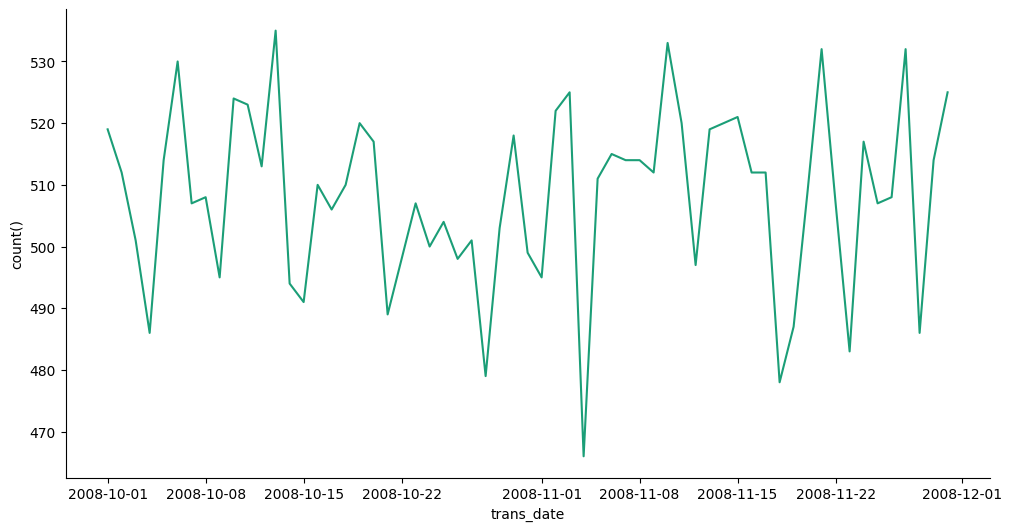

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['trans_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'trans_date'}, axis=1)
              .sort_values('trans_date', ascending=True))
  xs = counted['trans_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
DataFrame_sorted = DataFrame_hist_trans_60d.sort_values('trans_date', ascending=True)
_plot_series(DataFrame_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trans_date')
_ = plt.ylabel('count()')

Compute 24hr historical transaction

In [ ]:
# Number of transaction within 24 hrs
DataFrame_hist_orders_24h = \
    DataFrame1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

DataFrame_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

Compute 24hr historical fraud transaction

In [ ]:
# Number of fraud transaction within 24 hrs
DataFrame_hist_fraud_trans_24h = \
    DataFrame1[DataFrame1['Is Fraud?']== 'Yes']\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

DataFrame_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

Compute 2hr historical fraud transaction

In [ ]:
# Number of fraud transaction within 2 hrs
DataFrame_hist_fraud_trans_2h = \
    DataFrame1[DataFrame1['Is Fraud?']== 'Yes']\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

DataFrame_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

Compute 60day average spend

In [ ]:
#Average amount spent within 60 days
DataFrame_hist_trans_amt_avg_60d = \
    DataFrame1 \
    .groupby(['cc_num'])['Amount']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)
DataFrame_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']
DataFrame_hist_trans_amt_avg_60d['trans_date'] = DataFrame_hist_trans_amt_avg_60d['trans_date'].dt.date
DataFrame_hist_trans_amt_avg_60d = DataFrame_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()
DataFrame_hist_trans_amt_avg_60d['trans_date']

0        2008-10-02
1        2008-10-03
2        2008-10-04
3        2008-10-05
4        2008-10-06
            ...    
30999    2008-11-21
31000    2008-11-22
31001    2008-11-23
31002    2008-11-24
31003    2008-11-25
Name: trans_date, Length: 31004, dtype: object

Dataset Merging for Transaction Analysis

In [ ]:
#Combine transaction records

DataFrame1['trans_date_trans_time']=DataFrame1['trans_date_trans_time'].apply(pd.to_datetime)
DataFrame1['trans_date'] = DataFrame1['trans_date_trans_time'].apply(pd.to_datetime).dt.date
DataFrame2 = pd.merge(DataFrame1,DataFrame_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
DataFrame2 = pd.merge(DataFrame2,DataFrame_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

DataFrame2 = pd.merge(DataFrame2,DataFrame_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

DataFrame2 = pd.merge(DataFrame2,DataFrame_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

DataFrame2 = pd.merge(DataFrame2,DataFrame_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
DataFrame2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
DataFrame2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)
DataFrame2.head()

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,...,Num Credit Cards,index,cc_num,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,8826,255,5,2008,10,1,00:13,12.28,Swipe Transaction,97032797689821735,...,6,255,255_5,1,2008-10-01,31.0,4.0,0.0,0.0,42.809032
1,18858,583,2,2008,10,1,00:14,102.35,Swipe Transaction,3467663023930633227,...,4,583,583_2,1,2008-10-01,23.0,1.0,0.0,0.0,95.997826
2,5458,163,3,2008,10,1,00:16,25.43,Online Transaction,-2088492411650162548,...,5,163,163_3,1,2008-10-01,1.0,2.0,0.0,0.0,25.430000
3,50596,1470,1,2008,10,1,00:21,61.31,Swipe Transaction,-6853385250336487907,...,2,1470,1470_1,1,2008-10-01,75.0,2.0,0.0,0.0,39.246267
4,5881,182,0,2008,10,1,00:25,7.94,Online Transaction,-2088492411650162548,...,1,182,182_0,1,2008-10-01,1.0,2.0,0.0,0.0,7.940000


Sorting & Renaming Columns

In [ ]:
DataFrame2=DataFrame2.sort_values('Unnamed: 0').reset_index(drop=True)
DataFrame2=DataFrame2.rename(columns={'Unnamed: 0':'index','Errors?':'Errors','Is Fraud?':'Fraud'})
DataFrame2=DataFrame2.rename(columns={'Errors?':'Errors','Is Fraud?':'Fraud'})
import pandas as pd
DataFrame2=DataFrame2.rename(columns={'trans_hour':'Trans_hour','day_of_week':'Day_of_week','category':'MCC_Category'})
DataFrame2.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing_month_hist.csv",index= True)

In [ ]:
import pandas as pd
DataFrame2=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing_month_hist.csv")

In [ ]:
DataFrame2

,Unnamed: 0,index,User,Card,Year,Month,Day,Time,Amount,Use Chip,...,Num Credit Cards,index.1,cc_num,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,0,0,0,3,2008,10,2,06:20,89.54,Swipe Transaction,...,5,0,0_3,1,2008-10-02,0.0,0.0,0.0,0.0,0.000000
1,1,1,0,3,2008,10,2,21:23,65.82,Swipe Transaction,...,5,0,0_3,1,2008-10-02,0.0,1.0,0.0,0.0,0.000000
2,2,2,0,3,2008,10,3,06:39,43.42,Swipe Transaction,...,5,0,0_3,1,2008-10-03,2.0,2.0,0.0,0.0,77.680000
3,3,3,0,3,2008,10,4,13:24,136.58,Swipe Transaction,...,5,0,0_3,1,2008-10-04,3.0,2.0,0.0,0.0,66.260000
4,4,4,0,3,2008,10,4,13:34,82.05,Swipe Transaction,...,5,0,0_3,1,2008-10-04,3.0,1.0,0.0,0.0,66.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68471,68471,67701,1997,1,2008,11,29,16:20,149.39,Swipe Transaction,...,3,1997,1997_1,1,2008-11-29,147.0,3.0,0.0,0.0,42.185405
68472,68472,67702,1997,1,2008,11,29,18:20,30.55,Swipe Transaction,...,3,1997,1997_1,1,2008-11-29,147.0,3.0,0.0,0.0,42.185405
68473,68473,67703,1997,1,2008,11,29,19:33,14.59,Swipe Transaction,...,3,1997,1997_1,1,2008-11-29,147.0,4.0,0.0,0.0,42.185405
68474,68474,67704,1997,1,2008,11,30,19:05,32.47,Swipe Transaction,...,3,1997,1997_1,1,2008-11-30,151.0,4.0,0.0,0.0,42.635563


In [ ]:
columns=['index','Amount','Use Chip','Errors','Fraud','Trans_hour','Day_of_week','MCC_Category','Current Age','Gender','Latitude','Longitude','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d']
DataFrame_train=DataFrame2[columns]

# Feature Encoding

In [ ]:
# MCC
Dict={}
Category_Dict={}
x=0
for i in DataFrame_train['MCC_Category'].unique():
  Dict[i]=x
  x=x+1
Category_Dict['MCC_Category']=Dict
DataFrame_train.replace(Category_Dict,inplace=True)
# Category_Dict
DataFrame_train

<ipython-input-50-cb3916be5f4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame_train.replace(Category_Dict,inplace=True)


,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
0,0,89.54,Swipe Transaction,NaN,No,6,Thursday,0,53,Female,34.15,-117.76,0.0,0.0,0.0,0.000000
1,1,65.82,Swipe Transaction,NaN,No,21,Thursday,1,53,Female,34.15,-117.76,0.0,1.0,0.0,0.000000
2,2,43.42,Swipe Transaction,NaN,No,6,Friday,0,53,Female,34.15,-117.76,2.0,2.0,0.0,77.680000
3,3,136.58,Swipe Transaction,NaN,No,13,Saturday,2,53,Female,34.15,-117.76,3.0,2.0,0.0,66.260000
4,4,82.05,Swipe Transaction,NaN,No,13,Saturday,0,53,Female,34.15,-117.76,3.0,1.0,0.0,66.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68471,67701,149.39,Swipe Transaction,NaN,No,16,Saturday,8,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
68472,67702,30.55,Swipe Transaction,NaN,No,18,Saturday,1,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
68473,67703,14.59,Swipe Transaction,NaN,No,19,Saturday,1,47,Female,40.66,-74.19,147.0,4.0,0.0,42.185405
68474,67704,32.47,Swipe Transaction,NaN,No,19,Sunday,1,47,Female,40.66,-74.19,151.0,4.0,0.0,42.635563


In [ ]:
# Errors
DataFrame_train=DataFrame_train.fillna(value={'Errors':0})
Dict={}
Erros_Dict={}
x=1
for i in DataFrame_train['Errors'].unique():
  if i!=0:
    Dict[i]=x
    x=x+1
Erros_Dict['Errors']=Dict
dDataFrame_train=DataFrame_train.replace(Erros_Dict,inplace=True)
DataFrame_train.tail()
DataFrame_train.sort_values(by='Errors', ascending=False)

,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
27260,26936,49.04,Swipe Transaction,10,No,11,Thursday,0,46,Male,29.45,-98.50,50.0,5.0,0.0,50.985932
22822,22540,81.30,Swipe Transaction,9,No,16,Sunday,0,51,Female,38.70,-77.24,50.0,3.0,0.0,92.949216
50945,50339,6.97,Swipe Transaction,9,No,9,Friday,0,61,Male,38.35,-81.63,57.0,3.0,0.0,34.032281
35014,34596,86.89,Swipe Transaction,9,No,13,Saturday,0,49,Female,36.12,-95.91,116.0,3.0,0.0,68.342137
66234,65476,54.79,Swipe Transaction,9,No,6,Tuesday,0,44,Female,27.80,-97.39,12.0,4.0,0.0,25.234000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23028,22746,78.00,Swipe Transaction,0,No,17,Saturday,0,44,Male,30.19,-90.78,38.0,1.0,0.0,80.522683
23029,22747,-78.00,Swipe Transaction,0,No,17,Saturday,0,44,Male,30.19,-90.78,38.0,2.0,0.0,80.522683
23030,22748,46.90,Swipe Transaction,0,No,17,Saturday,0,44,Male,30.19,-90.78,38.0,3.0,0.0,80.522683
23031,22749,220.00,Swipe Transaction,0,No,18,Saturday,2,44,Male,30.19,-90.78,38.0,4.0,0.0,80.522683


In [ ]:
# Day of the week
Dict={}
Day_of_week_Dict={}
Dict['Monday']=0
Dict['Tuesday']=1
Dict['Wednesday']=2
Dict['Thursday']=3
Dict['Friday']=4
Dict['Saturday']=5
Dict['Sunday']=6
Day_of_week_Dict['Day_of_week']=Dict
DataFrame_train.replace(Day_of_week_Dict,inplace=True)
DataFrame_train.tail()

,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
68471,67701,149.39,Swipe Transaction,0,No,16,5,8,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
68472,67702,30.55,Swipe Transaction,0,No,18,5,1,47,Female,40.66,-74.19,147.0,3.0,0.0,42.185405
68473,67703,14.59,Swipe Transaction,0,No,19,5,1,47,Female,40.66,-74.19,147.0,4.0,0.0,42.185405
68474,67704,32.47,Swipe Transaction,0,No,19,6,1,47,Female,40.66,-74.19,151.0,4.0,0.0,42.635563
68475,67705,34.69,Swipe Transaction,0,No,19,6,1,47,Female,40.66,-74.19,151.0,2.0,0.0,42.635563


In [ ]:
# Other Features
DataFrame_train=DataFrame_train.replace('Swipe Transaction',0)
DataFrame_train=DataFrame_train.replace('Online Transaction',1)
DataFrame_train=DataFrame_train.replace('No',0)
DataFrame_train=DataFrame_train.replace('Yes',1)
DataFrame_train=DataFrame_train.replace('Female',0)
DataFrame_train=DataFrame_train.replace('Male',1)
DataFrame_train.tail()

,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
68471,67701,149.39,0,0,0,16,5,8,47,0,40.66,-74.19,147.0,3.0,0.0,42.185405
68472,67702,30.55,0,0,0,18,5,1,47,0,40.66,-74.19,147.0,3.0,0.0,42.185405
68473,67703,14.59,0,0,0,19,5,1,47,0,40.66,-74.19,147.0,4.0,0.0,42.185405
68474,67704,32.47,0,0,0,19,6,1,47,0,40.66,-74.19,151.0,4.0,0.0,42.635563
68475,67705,34.69,0,0,0,19,6,1,47,0,40.66,-74.19,151.0,2.0,0.0,42.635563


In [ ]:
DataFrame_train.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing_month_hist_encode.csv",index= False)

In [ ]:
from sklearn.preprocessing import RobustScaler
#RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()
for i in DataFrame_train.columns:
  if (i!='Fraud') & (i!='index'):
    DataFrame_train[i] = rob_scaler.fit_transform(DataFrame_train[i].values.reshape(-1,1))
# DataFrame_train=rob_scaler.fit_transform(DataFrame_train)
# DataFrame_train=pd.DataFrame(DataFrame_train,columns=DataFrame2_oversampled.columns)
DataFrame_train=DataFrame_train.astype('float64')
DataFrame_train

,index,Amount,Use Chip,Errors,Fraud,Trans_hour,Day_of_week,MCC_Category,Current Age,Gender,Latitude,Longitude,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
0,0.0,0.754711,0.0,0.0,0.0,-0.857143,0.00,-0.5,0.095238,0.0,-0.522161,-1.878788,-0.666667,-1.5,0.0,-1.399243
1,1.0,0.403421,0.0,0.0,0.0,1.285714,0.00,0.0,0.095238,0.0,-0.522161,-1.878788,-0.666667,-1.0,0.0,-1.399243
2,2.0,0.071680,0.0,0.0,0.0,-0.857143,0.25,-0.5,0.095238,0.0,-0.522161,-1.878788,-0.637681,-0.5,0.0,1.007175
3,3.0,1.451368,0.0,0.0,0.0,0.142857,0.50,0.5,0.095238,0.0,-0.522161,-1.878788,-0.623188,-0.5,0.0,0.653400
4,4.0,0.643785,0.0,0.0,0.0,0.142857,0.50,-0.5,0.095238,0.0,-0.522161,-1.878788,-0.623188,-1.0,0.0,0.653400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68471,67701.0,1.641083,0.0,0.0,0.0,0.571429,0.50,3.5,-0.190476,0.0,0.379501,0.710042,1.463768,0.0,0.0,-0.092398
68472,67702.0,-0.118923,0.0,0.0,0.0,0.857143,0.50,0.0,-0.190476,0.0,0.379501,0.710042,1.463768,0.0,0.0,-0.092398
68473,67703.0,-0.355289,0.0,0.0,0.0,1.000000,0.50,0.0,-0.190476,0.0,0.379501,0.710042,1.463768,0.5,0.0,-0.092398
68474,67704.0,-0.090488,0.0,0.0,0.0,1.000000,0.75,0.0,-0.190476,0.0,0.379501,0.710042,1.521739,0.5,0.0,-0.078453


In [ ]:
DataFrame_train.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing_month_hist_encode_standarize.csv",index= False)

In [ ]:
DataFrame2.to_csv("/content/drive/My Drive/Colab Notebooks/Processed Data/data_Preprocessing_month_hist_encode_oversample.csv",index= False)